### Import Libraries

In [1]:
import os, random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter

In [2]:
train_dir = "C://Users//DELL//Desktop//endtoend-mlops//data//raw//Covid19-dataset//train"
test_dir  = "C://Users//DELL//Desktop//endtoend-mlops//data//raw//Covid19-dataset//test"

### Class Distribution

In [3]:
def get_class_counts(data_dir):
    classes = os.listdir(data_dir)
    counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
    return counts

In [4]:
train_counts = get_class_counts(train_dir)
test_counts  = get_class_counts(test_dir)

print("Train Class Counts:", train_counts)
print("Test Class Counts:", test_counts)

Train Class Counts: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}
Test Class Counts: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


#### -observations-

`Class imbalance`

Covid has significantly more samples than Normal and Viral Pneumonia. This may bias the model toward predicting Covid unless handled (e.g., class weights or augmentation).

`Test set balance`

Roughly proportional to train set. Looks good.

`Dataset size`

Small dataset overall (~351 train + 66 test). Likely need transfer learning with pretrained CNN for good performance.

In [5]:
# Plot
labels = list(train_counts.keys())
train_vals = [train_counts[l] for l in labels]
test_vals  = [test_counts[l] for l in labels]

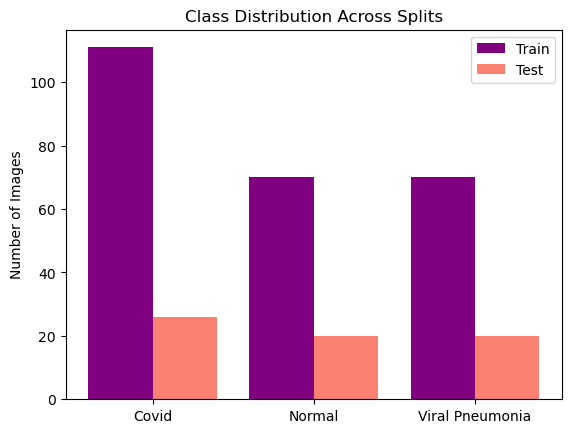

In [15]:
x = range(len(labels))
plt.bar([i-0.2 for i in x], train_vals, width=0.4, label="Train", color="purple")
plt.bar([i+0.2 for i in x], test_vals,  width=0.4, label="Test",  color="salmon")
plt.xticks(x, labels)
plt.ylabel("Number of Images")
plt.title("Class Distribution Across Splits")
plt.legend()
plt.show()

Next,

We will display 3 random images per class from both train and test splits.

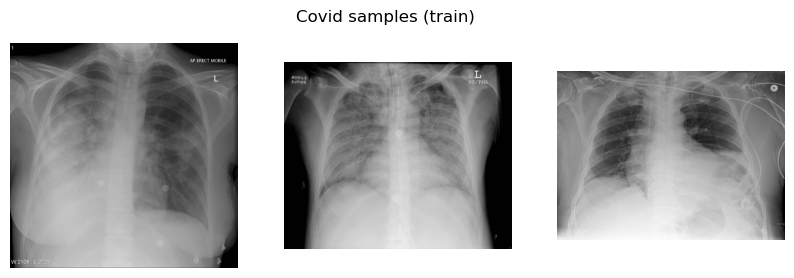

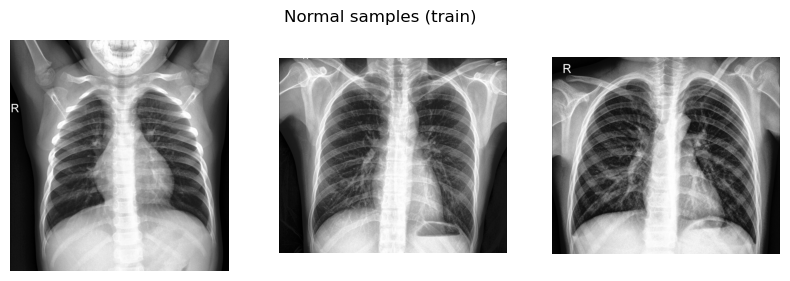

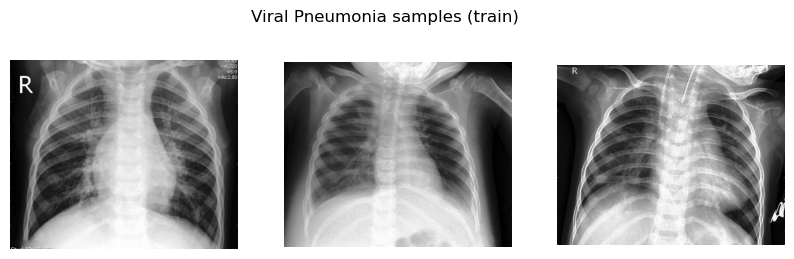

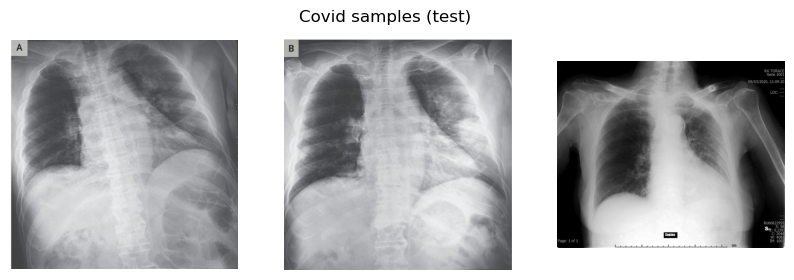

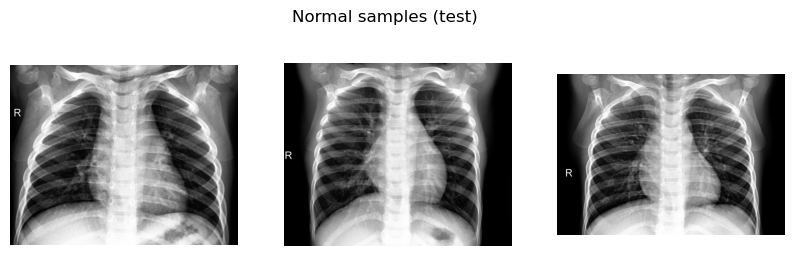

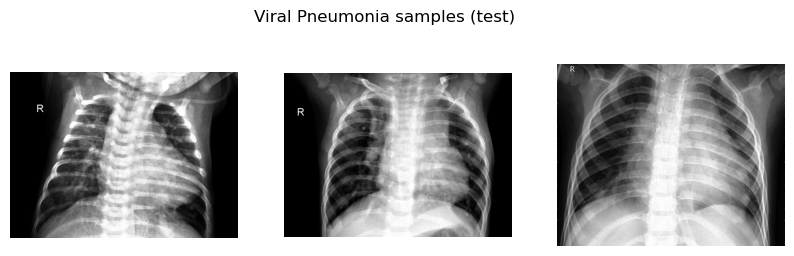

In [13]:
def show_samples(data_dir, class_name, n=4):
    img_list = os.listdir(os.path.join(data_dir, class_name))
    samples = random.sample(img_list, min(n, len(img_list)))
    plt.figure(figsize=(10,3))
    for i, img_name in enumerate(samples):
        img = Image.open(os.path.join(data_dir, class_name, img_name))
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"{class_name} samples ({data_dir.split('/')[-1]})")
    plt.show()

for split, d in [("Train", train_dir), ("Test", test_dir)]:
    for cls in os.listdir(d):
        show_samples(d, cls, n=3)

### Pixel Intensity Distribution

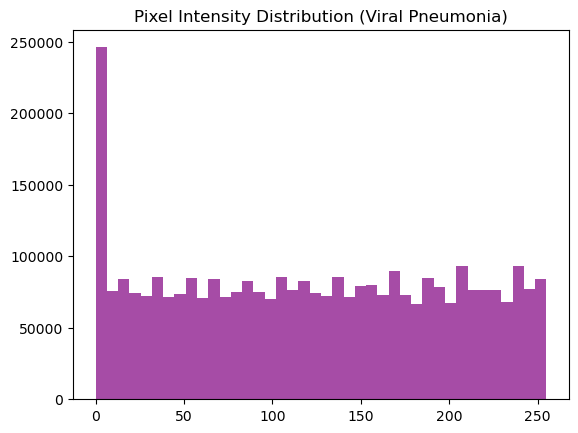

In [14]:
sample_split = random.choice([train_dir, test_dir])
sample_cls = random.choice(os.listdir(sample_split))
sample_img = random.choice(os.listdir(os.path.join(sample_split, sample_cls)))
img = np.array(Image.open(os.path.join(sample_split, sample_cls, sample_img)))
plt.hist(img.ravel(), bins=40, color="purple", alpha=0.7)
plt.title(f"Pixel Intensity Distribution ({sample_cls})")
plt.show()